In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import platform

# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin':
    mpl.rc('font', family='AppleGothic')
elif platform.system() == 'Linux':
    mpl.rc('font', family='NanumGothic')
elif platform.system() == 'Windows':
    mpl.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
X = np.arange(0, 3001, 1)
X

array([   0,    1,    2, ..., 2998, 2999, 3000])

In [6]:
from scipy.optimize import minimize


def elo(x, a, b, c, d):
    return a / (1 + np.exp((x - b) / c)) + d


def objective(params):
    a, b, c, d = params
    error_0 = (elo(0, a, b, c, d) - 45) ** 2
    error_1500 = (elo(1500, a, b, c, d) - 40) ** 2
    error_2000 = (elo(2000, a, b, c, d) - 25) ** 2
    error_5000 = (elo(5000, a, b, c, d) - 10) ** 2
    return error_0 + error_1500 + error_2000 + error_5000


initial_guess = [35, 2000, 1000, 10]  # 초기값 설정

result = minimize(
    objective, initial_guess, bounds=[(0, 100), (0, 6000), (100, 2000), (0, 50)]
)

print("최적 파라미터:", result.x)
print("f(0):", elo(0, *result.x))
print("f(1500):", elo(1500, *result.x))
print("f(2000):", elo(2000, *result.x))
print("f(5000):", elo(5000, *result.x))

최적 파라미터: [  35.0115796  1930.63327881  240.64853294    9.99989887]
f(0): 44.99999992882861
f(1500): 40.000000043805734
f(2000): 24.999999978699243
f(5000): 10.000000024988905


In [10]:
def elo(x: int) -> int:
    a, b, c, d = result.x
    return a / (1 + np.power(np.e, (x - b) / c)) + d

In [11]:
Y = np.array(list(map(elo, X)))
Y

array([44.99999993, 44.99995215, 44.99990417, ..., 10.4099481 ,
       10.40826753, 10.40659378])

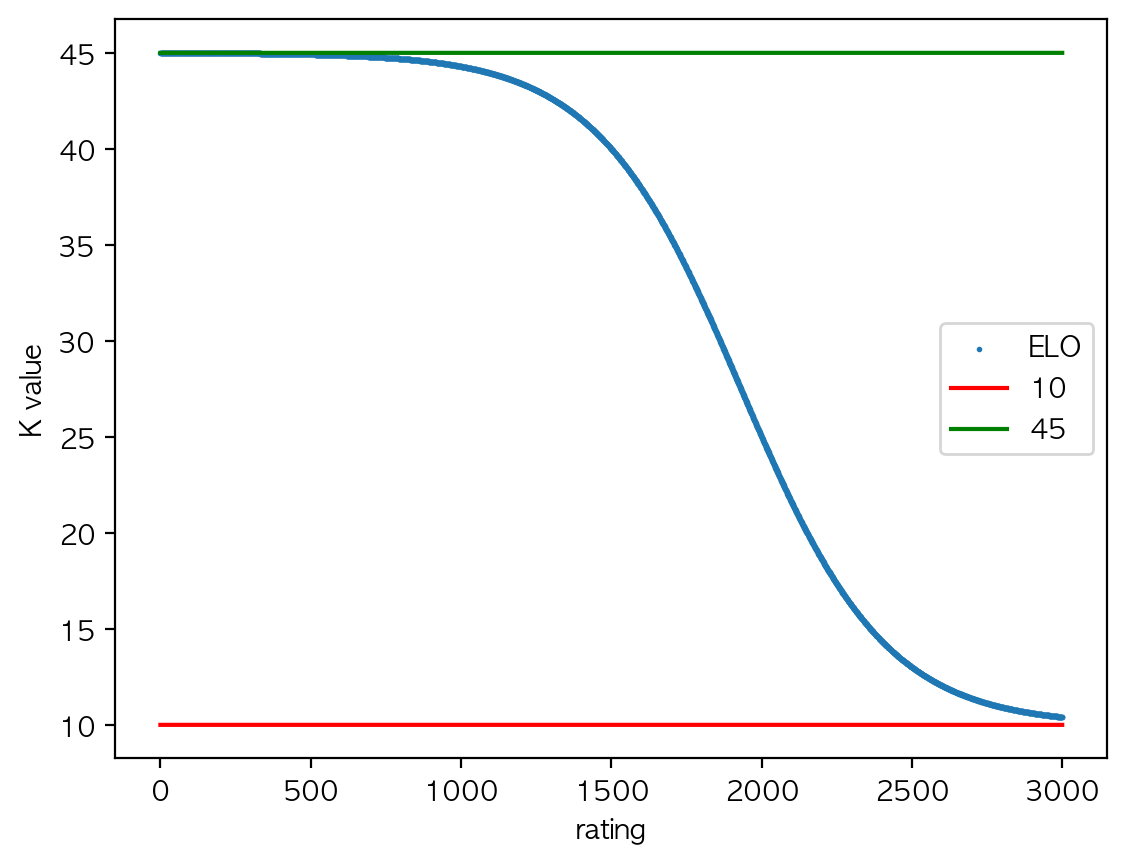

In [12]:
fig, ax = plt.subplots(1, 1)
ax.scatter(X, Y, s=1, label="ELO")
ax.plot(X, np.ones((len(X),)) * 10, c="r", label="10")
ax.plot(X, np.ones((len(X),)) * 45, c="g", label="45")
ax.set_xlabel("rating")
ax.set_ylabel("K value")
ax.legend(loc="best")
plt.show()

In [13]:
print(Y[0], Y[1500], Y[2000], Y[3000])

44.99999992882861 40.000000043805734 24.999999978699243 10.406593775063852
